In [1]:
import sys
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
from pathlib import Path

sys.path.append(Path.home() / "CarbonLab" / "Refl-Utils" / "src" / "reflutils")
from reflutils import FileDialog, Refl, tree

sns.set_style(
    "white",
    rc={
        "xtick.direction": "in",
        "ytick.direction": "in",
        "xtick.top": True,
        "ytick.right": True,
        "xtick.bottom": True,
        "ytick.left": True,
        "grid.linestyle": "--",
    },
)
sns.set_context("notebook")
sns.set_palette("colorblind")

In [3]:
xrrDataBase = FileDialog.getDirectory(title="Select the XRR Database")

# tree(xrrDataBase)

In [ ]:
tree(xrrDataBase)

In [6]:
energyList = xrrDataBase.iterdir()
energyList = [x for x in energyList if x.is_dir()]
POL = ["100.0", "190.0"]

In [ ]:
def multiPlot():
    combinedDataFrame = pd.DataFrame()
    wantedCols = ["Q", "Refl", "Err"]
    for e in energyList:
        try:
            xrr = Refl(e / POL[1])
            xrr.plot()
        except Exception as err:
            print(f"{e} - Could not plot {e.name} {POL[1]}")
            continue
        while True:
            if input("Press enter to continue") == "":
                break
            elif input("Press q to quit") == "q":
                return 0
        plt.plot()

In [168]:
multiPlot()

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
def multiEnPlot(pol: str = POL[0]):
    SCALE = -0.5
    combinedDataFrame = pd.DataFrame()
    wantedCols = ["Q", "Refl", "Err"]
    fig, ax = plt.subplots(figsize=(6, 12))
    sns.color_palette("colorblind", n_colors=len(energyList))
    for i, e in enumerate(energyList):
        try:
            xrr = Refl(e / pol)
            combinedCols = [f"{colName}_{e.name}_{pol}" for colName in wantedCols]
            combinedDataFrame[combinedCols] = xrr.refl[wantedCols]

            x = xrr.refl["Q"]
            y = xrr.refl["Refl"]
            yerr = xrr.refl["Err"]

            ax.errorbar(
                x,
                y * 10 ** (SCALE * i),
                yerr=yerr * 10 ** (SCALE * i),
                label=f"{e.name} {pol}",
                fmt="o",
            )
            ax.legend()
            ax.set_xlabel("Q")
            ax.set_ylabel("Reflectivity")
            ax.set_title("Reflectivity Curves \nCompared Across Energies", fontsize=16)
            ax.set_yscale("log")
            if i == 0:
                ax.set_xlim(0, max(x))
            else:
                if ax.get_xlim()[1] > max(x):
                    ax.set_xlim(0, max(x))
            ax.set_ylim(auto=True)
        except Exception as err:
            print(f"{err} - No data for  {e.name} {pol}")
            continue
    plt.show()
    return combinedDataFrame

No objects to concatenate - No data for  250.0 100.0
No objects to concatenate - No data for  282.3 100.0
No objects to concatenate - No data for  282.7 100.0
No objects to concatenate - No data for  282.9 100.0
No objects to concatenate - No data for  283.1 100.0
No objects to concatenate - No data for  283.3 100.0
No objects to concatenate - No data for  285.1 100.0
No objects to concatenate - No data for  287.0 100.0


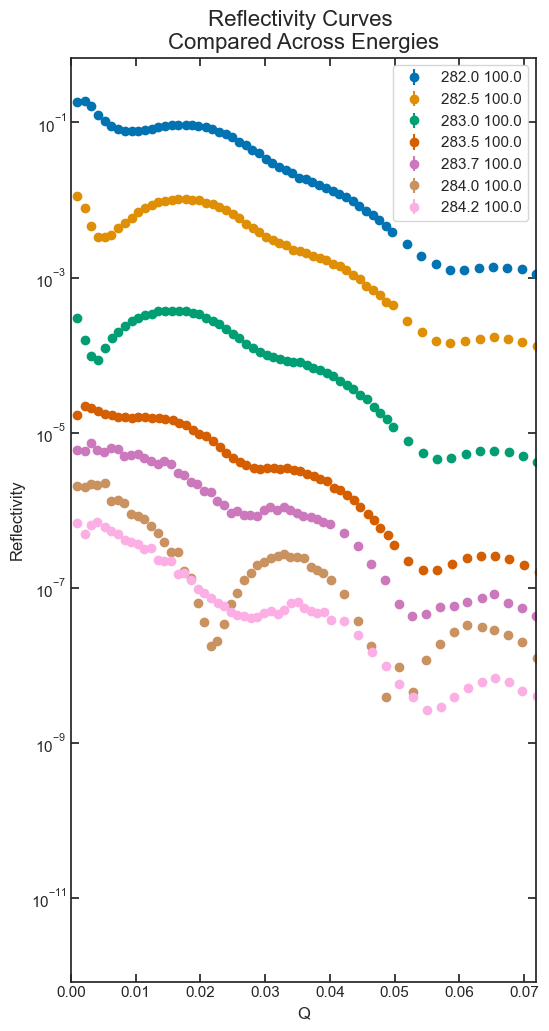

In [9]:
combinedRefl = multiEnPlot()

In [67]:
refl_283p7 = Refl(FileDialog.getDirectory())
refl_284p0 = Refl(FileDialog.getDirectory())
refl_284p2 = Refl(FileDialog.getDirectory())

ValueError: No objects to concatenate

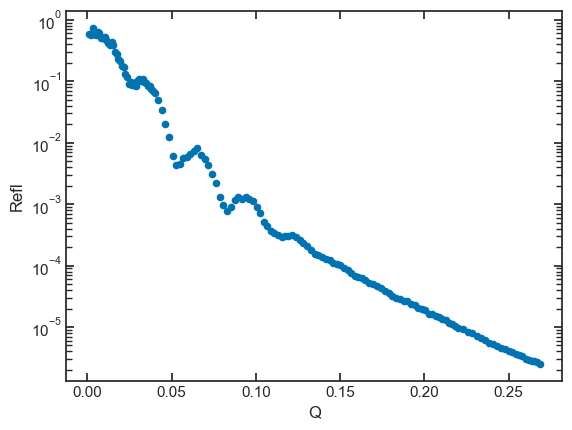

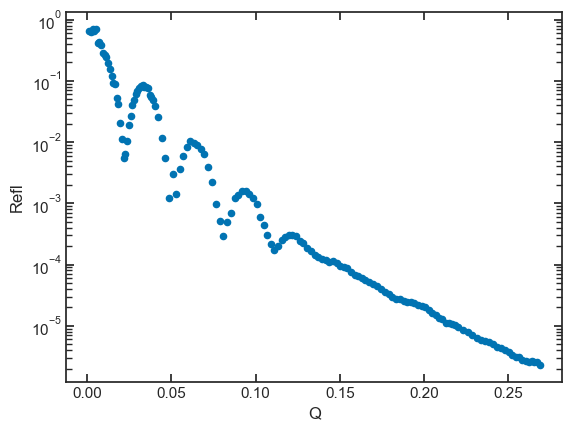

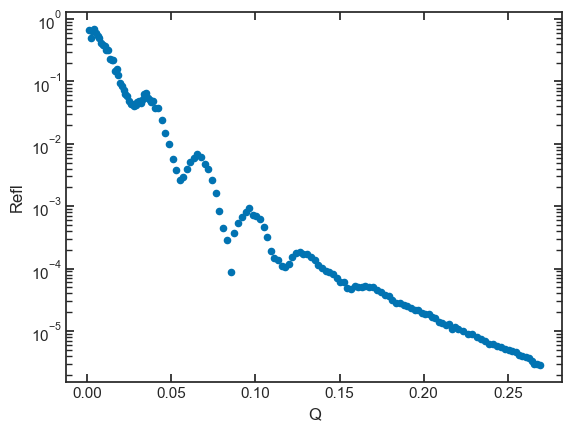

In [68]:
refl_283p7.plot()
refl_284p0.plot()
refl_284p2.plot()
# refl_285p1.plot()

In [69]:
refl_283p7_p = Refl(FileDialog.getDirectory())
refl_284p0_p = Refl(FileDialog.getDirectory())
refl_284p2_p = Refl(FileDialog.getDirectory())

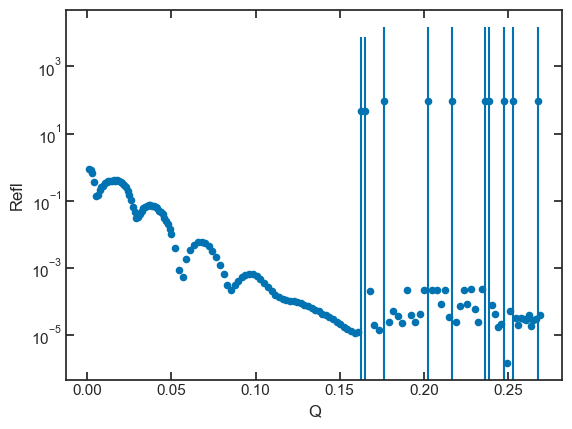

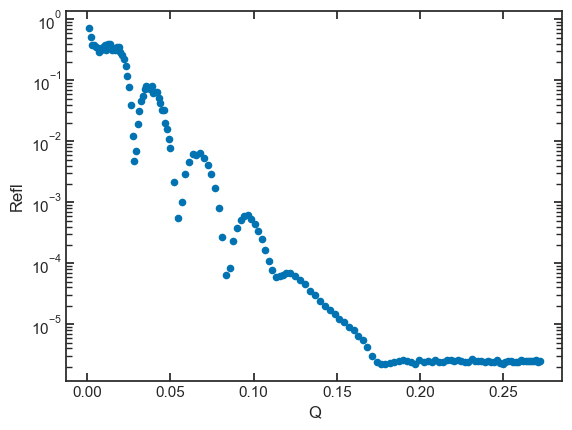

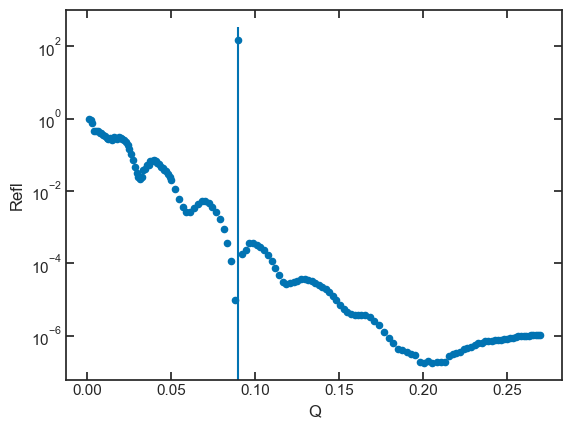

In [70]:
refl_283p7_p.plot()
refl_284p0_p.plot()
refl_284p2_p.plot()
# refl_285p1.plot()

In [ ]:
refl3.refl.to_csv(f"{xrrDataBase}250_190.csv", index=False)

In [ ]:
# combinedRefl.to_csv(xrrDataBase / f"EnergyComparison_{POL[0]}.csv", index=False)
combinedRefl = pd.read_csv(xrrDataBase / f"EnergyComparison_{POL[0]}.csv")

In [ ]:
roomTemp = [
    pd.read_csv(csv).dropna(axis=1)
    for csv in xrrDataBase.glob("*.csv")
    if "RT" in csv.name
]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_palette("colorblind", n_colors=2)
Q250_100 = roomTemp[0]["Q_250.0_100.0"]
Q283p7_100 = roomTemp[0]["Q_283.7_100.0"]
R250_100 = roomTemp[0]["Refl_250.0_100.0"]
R283p7_100 = roomTemp[0]["Refl_283.7_100.0"]
Err250_100 = roomTemp[0]["Err_250.0_100.0"]
Err283p7_100 = roomTemp[0]["Err_283.7_100.0"]

Q250_190 = roomTemp[1]["Q_250.0_190.0"]
Q283p7_190 = roomTemp[1]["Q_283.7_190.0"]
R250_190 = roomTemp[1]["Refl_250.0_190.0"]
R283p7_190 = roomTemp[1]["Refl_283.7_190.0"]
Err250_190 = roomTemp[1]["Err_250.0_190.0"]
Err283p7_190 = roomTemp[1]["Err_283.7_190.0"]

ax.errorbar(Q250_100, R250_100 * 2, yerr=Err250_100 * 2, fmt=".-")
ax.errorbar(Q250_190, R250_190, yerr=Err250_190, fmt=".-")

ax.errorbar(Q283p7_100, R283p7_100 * 2e8, yerr=Err250_100 * 2e8, fmt=".-")
ax.errorbar(Q283p7_190, R283p7_190 * 1e8, yerr=Err250_190 * 1e8, fmt=".-")

plt.title("Reflectivity of Room Temp \nPrepared ZnPc Samples", fontsize=16)
ax.legend(["spol", "ppol"])
ax.hlines(5, 0, 0.25, linestyles="dashed", color="grey")
ax.text(0, 1e8, r"$\times 10^7$")
ax.text(
    0.125,
    3e8,
    "283.7 eV",
    verticalalignment="center",
    horizontalalignment="center",
    fontsize=14,
)
ax.text(
    0.125,
    1e0,
    "250 eV",
    verticalalignment="center",
    horizontalalignment="center",
    fontsize=14,
)

plt.semilogy()
plt.xlim(0, 0.25)
plt.xlabel(r"Q $[/AA^{-1}]$")
plt.ylabel(r"Reflectivity")

Text(0, 0.5, 'Reflectivity')

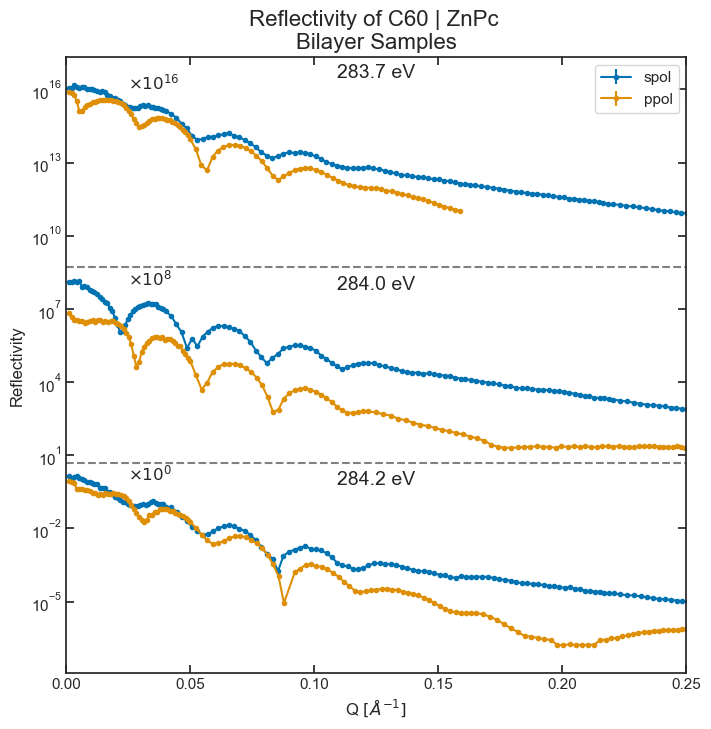

In [102]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_palette("colorblind", n_colors=2)

Q_283p7_100 = refl_283p7.refl.Q
R_283p7_100 = refl_283p7.refl.Refl
Err_283p7_100 = refl_283p7.refl.Err

Q_284p0_100 = refl_284p0.refl.Q
R_284p0_100 = refl_284p0.refl.Refl
Err_284p0_100 = refl_284p0.refl.Err

Q_284p2_100 = refl_284p2.refl.Q
R_284p2_100 = refl_284p2.refl.Refl
Err_284p2_100 = refl_284p2.refl.Err


Q_284p0_190 = refl_284p0_p.refl.Q
R_284p0_190 = refl_284p0_p.refl.Refl
Err_284p0_190 = refl_284p0_p.refl.Err

Q_283p7_190 = refl_283p7_p.refl.Q[:-52]
R_283p7_190 = refl_283p7_p.refl.Refl[:-52]
Err_283p7_190 = refl_283p7_p.refl.Err[:-52]

Q_284p2_190 = refl_284p2_p.refl.Q[refl_284p2_p.refl.Refl <= 1]
R_284p2_190 = refl_284p2_p.refl.Refl[refl_284p2_p.refl.Refl <= 1]
Err_284p2_190 = refl_284p2_p.refl.Err[refl_284p2_p.refl.Refl <= 1]


ax.errorbar(Q_283p7_100, R_283p7_100 * 2e16, yerr=Err_283p7_100 * 2e16, fmt=".-")
ax.errorbar(Q_283p7_190, R_283p7_190 * 9e15, yerr=Err_283p7_190 * 9e15, fmt=".-")

ax.errorbar(Q_284p0_100, R_284p0_100 * 2e8, yerr=Err_284p0_100 * 2e8, fmt=".-")
ax.errorbar(Q_284p0_190, R_284p0_190 * 0.9e7, yerr=Err_284p0_190 * 0.9e7, fmt=".-")

ax.errorbar(Q_284p2_100, R_284p2_100 * 2, yerr=Err_284p2_100 * 2, fmt=".-")
ax.errorbar(Q_284p2_190, R_284p2_190 * 0.9, yerr=Err_284p2_190 * 0.9, fmt=".-")

plt.title("Reflectivity of C60 | ZnPc \nBilayer Samples", fontsize=16)
ax.legend(["spol", "ppol"])
ax.hlines(5, 0, 0.25, linestyles="dashed", color="grey")
ax.hlines(5e8, 0, 0.25, linestyles="dashed", color="grey")

ax.text(0.025, 1e0, r"$\times 10^0$")
ax.text(0.025, 1e8, r"$\times 10^8$")
ax.text(0.025, 1e16, r"$\times 10^{16}$")

ax.text(
    0.125,
    1e0,
    "284.2 eV",
    verticalalignment="center",
    horizontalalignment="center",
    fontsize=14,
)

ax.text(
    0.125,
    1e8,
    "284.0 eV",
    verticalalignment="center",
    horizontalalignment="center",
    fontsize=14,
)

ax.text(
    0.125,
    5e16,
    "283.7 eV",
    verticalalignment="center",
    horizontalalignment="center",
    fontsize=14,
)

plt.semilogy()
plt.xlim(0, 0.25)
plt.xlabel(r"Q $[\AA^{-1}]$")
plt.ylabel(r"Reflectivity")

In [104]:
refl_250_f = Refl(FileDialog.getDirectory())
refl_283p7_f = Refl(FileDialog.getDirectory())

refl_250_fp = Refl(FileDialog.getDirectory())
refl_283p7_fp = Refl(FileDialog.getDirectory())

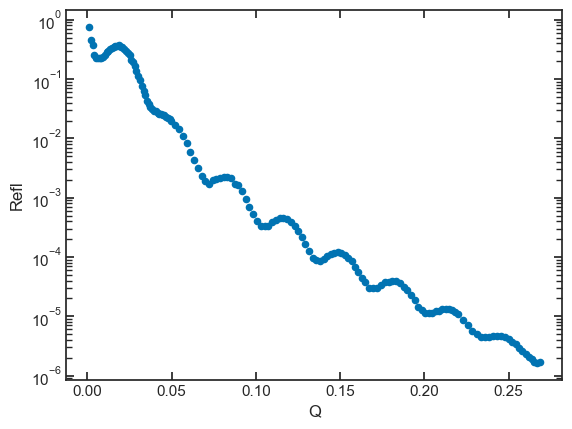

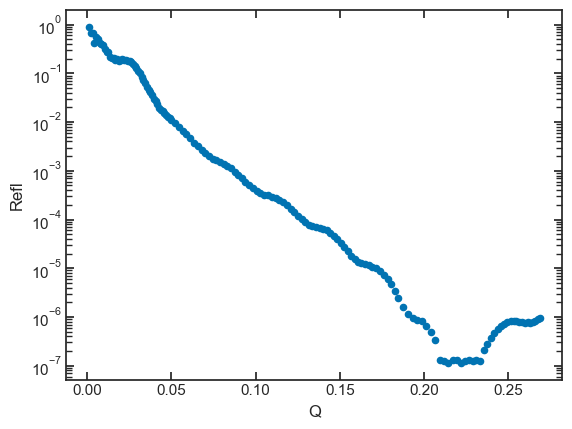

In [120]:
refl_283p7_f.plot()
refl_283p7_fp.plot()

Text(0, 0.5, 'Reflectivity')

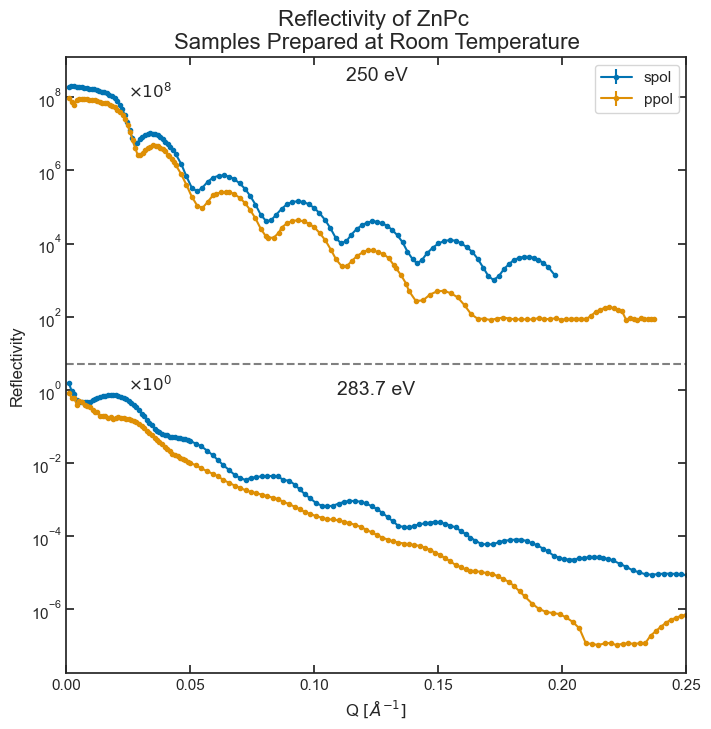

In [122]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_palette("colorblind", n_colors=2)

Q_250_100 = refl_250_f.refl.Q
R_250_100 = refl_250_f.refl.Refl
Err_250_100 = refl_250_f.refl.Err

Q_283p7_100 = refl_283p7_f.refl.Q
R_283p7_100 = refl_283p7_f.refl.Refl
Err_283p7_100 = refl_283p7_f.refl.Err


Q_250_190 = refl_250_fp.refl.Q
R_250_190 = refl_250_fp.refl.Refl
Err_250_190 = refl_250_fp.refl.Err

Q_283p7_190 = refl_283p7_fp.refl.Q
R_283p7_190 = refl_283p7_fp.refl.Refl
Err_283p7_190 = refl_283p7_fp.refl.Err


ax.errorbar(Q_283p7_100, R_283p7_100 * 2, yerr=Err_283p7_100 * 2, fmt=".-")
ax.errorbar(Q_283p7_190, R_283p7_190 * 0.9, yerr=Err_283p7_190 * 0.9, fmt=".-")

ax.errorbar(Q_250_100, R_250_100 * 2e8, yerr=Err_250_100 * 2e8, fmt=".-")
ax.errorbar(Q_250_190, R_250_190 * 1e8, yerr=Err_250_190 * 1e8, fmt=".-")


plt.title("Reflectivity of ZnPc \nSamples Prepared at Room Temperature", fontsize=16)
ax.legend(["spol", "ppol"])
ax.hlines(5, 0, 0.25, linestyles="dashed", color="grey")

ax.text(0.025, 1e0, r"$\times 10^0$")
ax.text(0.025, 1e8, r"$\times 10^8$")

ax.text(
    0.125,
    1e0,
    "283.7 eV",
    verticalalignment="center",
    horizontalalignment="center",
    fontsize=14,
)

ax.text(
    0.125,
    4e8,
    "250 eV",
    verticalalignment="center",
    horizontalalignment="center",
    fontsize=14,
)

plt.semilogy()
plt.xlim(0, 0.25)
plt.xlabel(r"Q $[\AA^{-1}]$")
plt.ylabel(r"Reflectivity")

In [128]:
refl_250_r = Refl(FileDialog.getDirectory())
refl_283p7_r = Refl(FileDialog.getDirectory())

refl_250_rp = Refl(FileDialog.getDirectory())
refl_283p7_rp = Refl(FileDialog.getDirectory())

ValueError: Unable to coerce to DataFrame, shape must be (1, 15): given (4, 15)

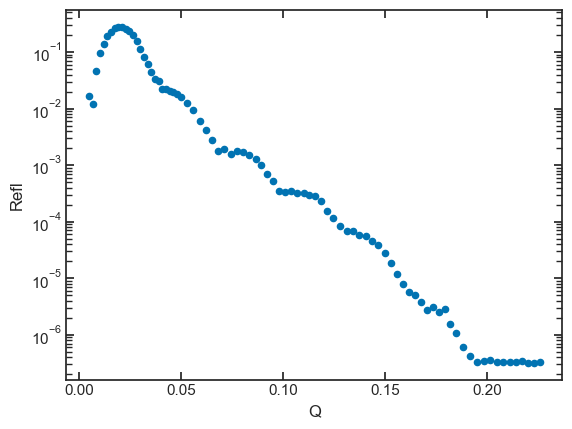

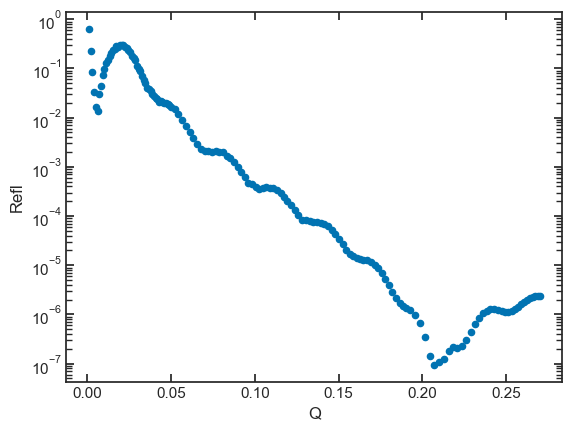

In [130]:
refl_283p7_r.plot()
refl_283p7_rp.plot()

Text(0, 0.5, 'Reflectivity')

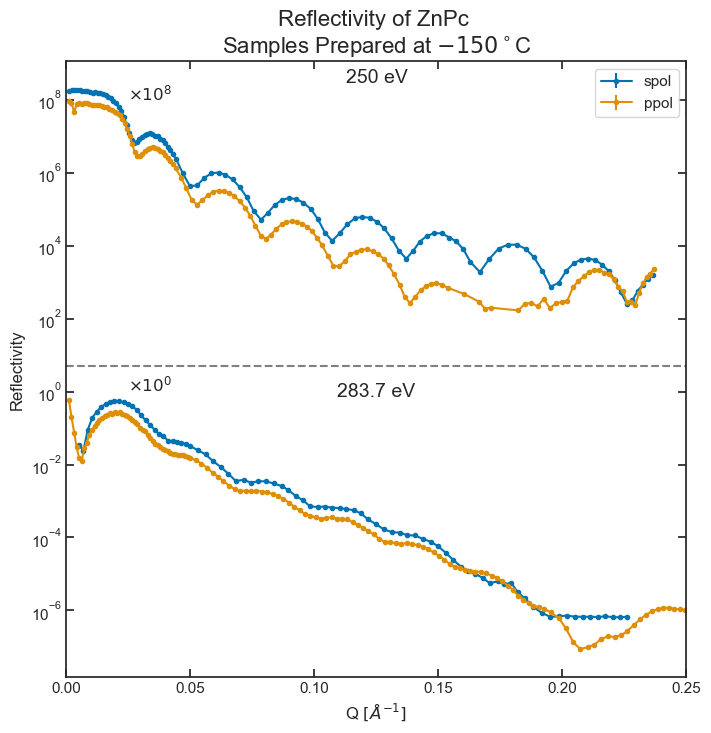

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_palette("colorblind", n_colors=2)

Q_250_100 = refl_250_r.refl.Q
R_250_100 = refl_250_r.refl.Refl
Err_250_100 = refl_250_r.refl.Err

Q_283p7_100 = refl_283p7_r.refl.Q
R_283p7_100 = refl_283p7_r.refl.Refl
Err_283p7_100 = refl_283p7_r.refl.Err


Q_250_190 = refl_250_rp.refl.Q
R_250_190 = refl_250_rp.refl.Refl
Err_250_190 = refl_250_rp.refl.Err

Q_283p7_190 = refl_283p7_rp.refl.Q
R_283p7_190 = refl_283p7_rp.refl.Refl
Err_283p7_190 = refl_283p7_rp.refl.Err


ax.errorbar(Q_283p7_100, R_283p7_100 * 2, yerr=Err_283p7_100 * 2, fmt=".-")
ax.errorbar(Q_283p7_190, R_283p7_190 * 0.9, yerr=Err_283p7_190 * 0.9, fmt=".-")

ax.errorbar(Q_250_100, R_250_100 * 2e8, yerr=Err_250_100 * 2e8, fmt=".-")
ax.errorbar(Q_250_190, R_250_190 * 1e8, yerr=Err_250_190 * 1e8, fmt=".-")


plt.title("Reflectivity of ZnPc \nSamples Prepared at " + r"$-150^\circ$C", fontsize=16)
ax.legend(["spol", "ppol"])
ax.hlines(5, 0, 0.25, linestyles="dashed", color="grey")

ax.text(0.025, 1e0, r"$\times 10^0$")
ax.text(0.025, 1e8, r"$\times 10^8$")

ax.text(
    0.125,
    1e0,
    "283.7 eV",
    verticalalignment="center",
    horizontalalignment="center",
    fontsize=14,
)

ax.text(
    0.125,
    4e8,
    "250 eV",
    verticalalignment="center",
    horizontalalignment="center",
    fontsize=14,
)

plt.semilogy()
plt.xlim(0, 0.25)
plt.xlabel(r"Q $[\AA^{-1}]$")
plt.ylabel(r"Reflectivity")